<a href="https://colab.research.google.com/github/blitzJar/tiny_dataworks/blob/main/word_cloudFunc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install nlp_rake


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 25.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993224 sha256=42231718c04cc00aef13676eb48b9c616286463dd43a609a689831f5c14059f2
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect


In [ ]:
import requests
from html.parser import HTMLParser
#import nlp_rake
from wordcloud import WordCloud
import matplotlib.pyplot as plt

#-------------------------------------------------------------------------------

def wordCloudinator(url):
  text = requests.get(url).content.decode('utf-8')

  class MyHTMLParser(HTMLParser):
    script = False
    res = ""
    def handle_starttag(self, tag, attrs):
      if tag.lower() in ['script', 'style']:
        self.script = True

    def handle_endtag(self, tag):
      if tag.lower() in ['script', 'style']:
        self.script = False

    def handle_data(self, data):
      if str.strip(data) == "" or self.script:
        return
      self.res += ' '+data.replace('[ edit ]', '')

  parser = MyHTMLParser()
  parser.feed(text)
  text = parser.res

  #extractor = nlp_rake.Rake(max_words=2, min_freq=5, min_chars=5)
  #res = extractor.apply(text)

  wc = WordCloud(background_color='white', width=800, height=600)
  plt.figure(figsize=(15,7))
  plt.imshow(wc.generate(text))

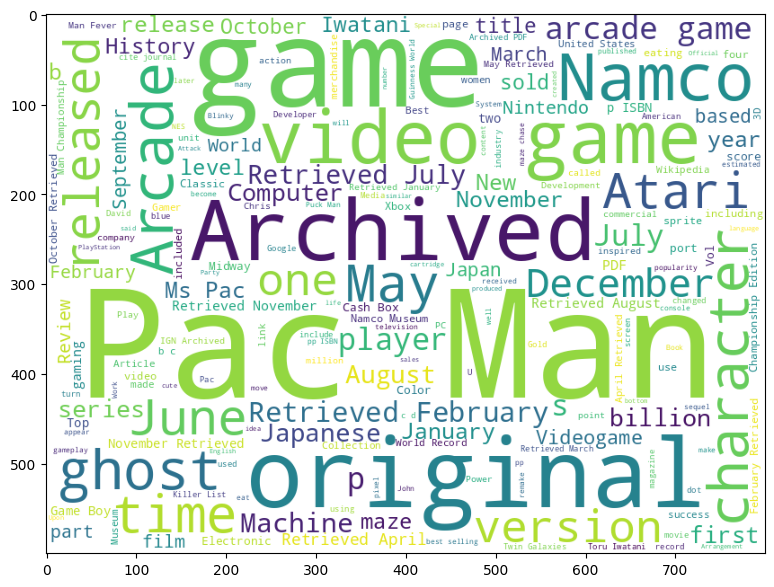

In [ ]:

url = 'https://en.wikipedia.org/wiki/Pac-Man'
wordCloudinator(url)